# More Beats for This!: Reproducing Beat this! paper results and fail case analysis

## install all the requirements/data for reproducing results

In [ ]:
# download the whole repo we need the launch scripts
!git clone https://github.com/CPJKU/beat_this.git

Cloning into 'beat_this'...
remote: Enumerating objects: 1194, done.
remote: Counting objects: 100% (208/208), done.
remote: Compressing objects: 100% (58/58), done.
remote: Total 1194 (delta 165), reused 182 (delta 150), pack-reused 986 (from 1)
Receiving objects: 100% (1194/1194), 10.43 MiB | 15.07 MiB/s, done.
Resolving deltas: 100% (812/812), done.


In [ ]:
!mv beat_this/* .
!rm -rf beat_this

mv: cannot move 'beat_this/beat_this' to './beat_this': Directory not empty


In [ ]:
# install requirements for computing eval metrics
!pip install pytorch_lightning pandas
!pip install https://github.com/mir-evaluation/mir_eval/archive/main.zip

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 819.3/819.3 kB 44.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 63.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 35.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 43.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 2.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 5.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 11.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 7.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 6.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 88.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 931.7/931.7 kB 48.8 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-

In [ ]:
# install the beat_this package
!pip install https://github.com/CPJKU/beat_this/archive/main.zip

     - 5.0 MB 2.9 MB/s 0:00:01
  Preparing metadata (setup.py) ... done
  Created wheel for beat-this: filename=beat_this-0.1-py3-none-any.whl size=39306 sha256=08ff86cf1e1699700925faaf807993e2581c0db957a13f8b84c22b80fc001d4d
  Stored in directory: /tmp/pip-ephem-wheel-cache-cwbl39us/wheels/a1/1c/be/c2a2e75224d5cf5bc9cd42e2abf51275b69ec02974b45a38f1
Successfully built beat-this


In [1]:
# get the data
!mkdir -p data
!git clone https://github.com/CPJKU/beat_this_annotations data/annotations

Cloning into 'data/annotations'...
remote: Enumerating objects: 5506, done.
remote: Counting objects: 100% (5506/5506), done.
remote: Compressing objects: 100% (5380/5380), done.
remote: Total 5506 (delta 115), reused 5489 (delta 106), pack-reused 0 (from 0)
Receiving objects: 100% (5506/5506), 5.59 MiB | 2.78 MiB/s, done.
Resolving deltas: 100% (115/115), done.


In [ ]:
import os

# Download the dataset
!wget https://zenodo.org/records/13922116/files/gtzan.zip?download=1 -O gtzan.zip

# Create the directory structure
!mkdir -p data/audio/spectrograms

# Extract the zip file
!unzip gtzan.zip -d data/audio/spectrograms

# Remove the zip file
!rm gtzan.zip

--2025-03-14 12:03:04--  https://zenodo.org/records/13922116/files/gtzan.zip?download=1
Resolving zenodo.org (zenodo.org)... 188.185.48.194, 188.185.45.92, 188.185.43.25, ...
Connecting to zenodo.org (zenodo.org)|188.185.48.194|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 306944985 (293M) [application/octet-stream]
Saving to: ‘gtzan.zip’

gtzan.zip           100%[===================>] 292.72M  11.3MB/s    in 27s     

2025-03-14 12:03:32 (10.7 MB/s) - ‘gtzan.zip’ saved [306944985/306944985]

Archive:  gtzan.zip
  inflating: data/audio/spectrograms/gtzan.npz  


## Run Beat this with modified `compute_paper_metrics.py`

In [ ]:
# Download our file from GitHub and save it to the launch_scripts directory
!wget https://raw.githubusercontent.com/smilo7/more-beats-for-this/main/modified-beat-this-scripts/compute_paper_metrics_modified.py -O launch_scripts/compute_paper_metrics_modified.py


### for final model

In [ ]:
!python launch_scripts/compute_paper_metrics_modified.py --models final0 final1 final2 --datasplit test

Seed set to 0
Creating datamodule
Skipping gtzan/gtzan_jazz_00003 because it has 1 columns but downbeat is supposed to be there.
Skipping gtzan/gtzan_jazz_00010 because it has 1 columns but downbeat is supposed to be there.
Skipping gtzan/gtzan_jazz_00009 because it has 1 columns but downbeat is supposed to be there.
Skipping gtzan/gtzan_jazz_00020 because it has 1 columns but downbeat is supposed to be there.
Skipping gtzan/gtzan_jazz_00014 because it has 1 columns but downbeat is supposed to be there.
Skipping gtzan/gtzan_jazz_00018 because it has 1 columns but downbeat is supposed to be there.
Test set: 993 items from: gtzan
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/usr/local/lib/python3.11/dist-packages/torch/utils/data/dataloader.py:617: UserWarning: This DataLoader will create 8 worker processes in total. Our suggested max number of worker in current system is 2,

### for small model

In [ ]:
!python launch_scripts/compute_paper_metrics_modified.py --models small0 small1 small2 --datasplit test

Seed set to 0
Downloading: "https://cloud.cp.jku.at/index.php/s/7ik4RrBKTS273gp/download?path=%2F&files=small0.ckpt" to /root/.cache/torch/hub/checkpoints/beat_this-small0.ckpt
100% 8.06M/8.06M [00:02<00:00, 3.89MB/s]
Creating datamodule
Skipping gtzan/gtzan_jazz_00003 because it has 1 columns but downbeat is supposed to be there.
Skipping gtzan/gtzan_jazz_00010 because it has 1 columns but downbeat is supposed to be there.
Skipping gtzan/gtzan_jazz_00018 because it has 1 columns but downbeat is supposed to be there.
Skipping gtzan/gtzan_jazz_00009 because it has 1 columns but downbeat is supposed to be there.
Skipping gtzan/gtzan_jazz_00014 because it has 1 columns but downbeat is supposed to be there.
Skipping gtzan/gtzan_jazz_00020 because it has 1 columns but downbeat is supposed to be there.
Test set: 993 items from: gtzan
Using 16bit Automatic Mixed Precision (AMP)
GPU available: True (cuda), used: True
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


## Fail case analysis

### plot the top worst tracks by f-measure

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Load the logged metrics
log_file = "file_metrics_log.csv"
df = pd.read_csv(log_file)
df.head()

worst_metric = "F-measure_beat"

# Sort by worst metric (highest loss)
df_sorted = df.sort_values(by=worst_metric, ascending=True)

# Select the top 10 worst-performing tracks
top_n = 100
df_worst = df_sorted.head(top_n)

# Print the table of worst-performing tracks
df_worst

,Piece,Dataset,F-measure_beat,Cemgil_beat,CMLt_beat,AMLt_beat,F-measure_downbeat,Cemgil_downbeat,CMLt_downbeat,AMLt_downbeat
36,gtzan/gtzan_blues_00036/track.npy,gtzan,0.000000,0.265311,0.019608,0.686275,0.000000,0.000643,1.000000,1.000000
595,gtzan/gtzan_metal_00001/track.npy,gtzan,0.000000,0.477354,0.000000,0.984615,0.000000,0.000011,0.941176,0.941176
30,gtzan/gtzan_blues_00030/track.npy,gtzan,0.000000,0.177261,0.000000,0.826087,0.000000,0.000072,1.000000,1.000000
127,gtzan/gtzan_classical_00027/track.npy,gtzan,0.000000,0.232456,0.000000,0.700000,0.000000,0.000103,0.166667,0.166667
598,gtzan/gtzan_metal_00004/track.npy,gtzan,0.066116,0.177939,0.015625,0.515625,0.000000,0.010143,0.450000,0.450000
...,...,...,...,...,...,...,...,...,...,...
19,gtzan/gtzan_blues_00019/track.npy,gtzan,0.606452,0.653783,0.000000,0.846154,0.204082,0.215770,0.000000,0.055556
504,gtzan/gtzan_jazz_00005/track.npy,gtzan,0.607407,0.670321,0.000000,0.846154,0.270270,0.273406,0.000000,0.000000
689,gtzan/gtzan_metal_00095/track.npy,gtzan,0.610526,0.651721,0.000000,0.904762,0.583333,0.643079,0.000000,0.937500
33,gtzan/gtzan_blues_00033/track.npy,gtzan,0.612245,0.589560,0.000000,0.969697,0.666667,0.577451,0.312500,0.454545


### get the GTZAN audio files for later

In [ ]:
# mir data link is down

!pip install mirdata

import mirdata
# intialize the gtzan dataset
gtzan = mirdata.initialize('gtzan_genre', data_home='/content/mir_data')

# download it (only once)
gtzan.download(partial_download=['all']) # comment out this line after you have downloaded the data

In [ ]:
gtzan.download(partial_download=['all']) # comment out this line after you have downloaded the data

In [ ]:
import shutil
import os
import kagglehub

# Download latest version
path = kagglehub.dataset_download("andradaolteanu/gtzan-dataset-music-genre-classification")

print("Path to dataset files:", path)

# Define the target folder path
target_folder = "gtzan_audio"

# Create the target folder if it doesn't exist
if not os.path.exists(target_folder):
    os.makedirs(target_folder)

# Move the downloaded files to the target folder
for filename in os.listdir(path):
    source_path = os.path.join(path, filename)
    destination_path = os.path.join(target_folder, filename)

    if os.path.isfile(source_path):
        shutil.move(source_path, destination_path)
    elif os.path.isdir(source_path):
        shutil.move(source_path, destination_path)

print(f"Files moved to: {target_folder}")


### estimate the time signature of worst tracks from the .beats files

In [ ]:
import numpy as np
from collections import Counter

def detect_time_signature(beats_file):
    # Load beats data
    beat_times, beat_numbers = np.loadtxt(beats_file, unpack=True)

    # Find repeating cycle pattern
    diffs = np.diff(beat_numbers)  # Differences between consecutive beats
    cycle_lengths = []

    current_cycle = []
    for i in range(len(diffs)):
        current_cycle.append(beat_numbers[i])
        if diffs[i] < 0:  # Detect restart of the beat cycle
            cycle_lengths.append(len(current_cycle))
            current_cycle = []

    # Count occurrences of cycle lengths
    if cycle_lengths:
        most_common_cycle = Counter(cycle_lengths).most_common(1)[0][0]
        return f"{most_common_cycle}/4"
    else:
        return "Unable to determine time signature."

# Usage example
beats_file = "/content/data/annotations/gtzan/annotations/beats/gtzan_blues_00000.beats"
print(detect_time_signature(beats_file))


Detected Time Signature: 4/4


# Analysis of time signatures in the training set

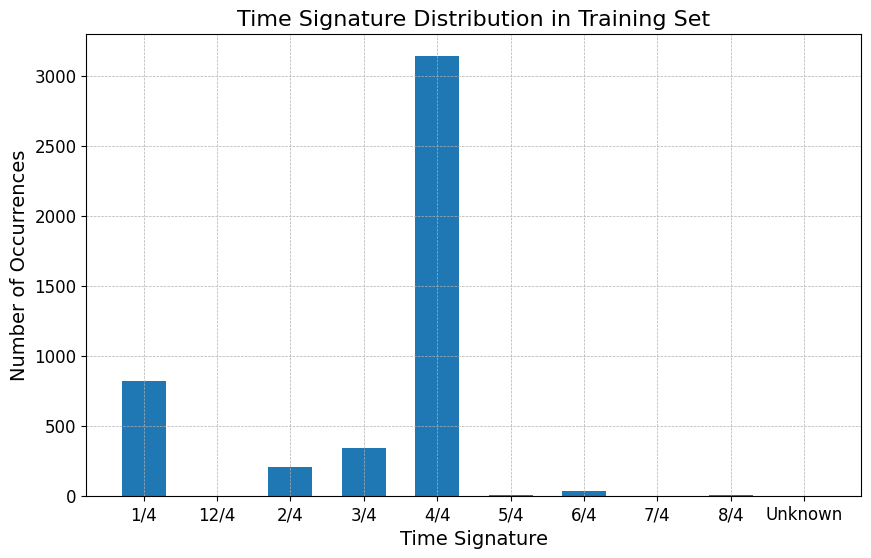

In [5]:
import os
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict, Counter

def parse_beats_file(filepath):
    """Parse a .beats file to extract beat times and optionally beat numbers."""
    beats = []
    beat_numbers = []
    with open(filepath, 'r') as f:
        for line in f:
            parts = line.strip().split()
            if len(parts) == 2:
                time, beat = float(parts[0]), int(parts[1])
                beat_numbers.append(beat)
            else:
                time = float(parts[0])
            beats.append(time)
    return beats, beat_numbers if beat_numbers else None

def infer_time_signature(beats, beat_numbers):
    """Determine the time signature(s) based on beat positions and numbers."""
    if beat_numbers:
        # Detect repeating bar lengths
        bar_lengths = np.diff([i for i, b in enumerate(beat_numbers) if b == 1])
        if len(bar_lengths) > 0:
            common_bar_length = Counter(bar_lengths).most_common(1)
            if common_bar_length:
                return f"{common_bar_length[0][0]}/4"
    
    # Fallback: Estimate from beat spacing if no downbeats are given
    if len(beats) < 2:
        return "Unknown"  # Not enough data to infer time signature
    
    diffs = np.diff(beats)
    avg_beat_interval = np.median(diffs) if len(diffs) > 0 else None
    
    if avg_beat_interval is None or avg_beat_interval == 0:
        return "Unknown"
    
    # Check periodic patterns in beat intervals
    intervals = np.round(diffs / avg_beat_interval).astype(int)
    
    if len(intervals) == 0:
        return "Unknown"

    common_pattern = Counter(intervals).most_common(1)
    if not common_pattern:
        return "Unknown"

    return f"{common_pattern[0][0]}/4"


def process_annotations(data_dir, skip_folders=[]):
    """Process all beat annotation files and return a dictionary of time signatures."""
    time_signatures = defaultdict(list)
    
    for root, dirs, files in os.walk(data_dir):
        if any(skip in root for skip in skip_folders):
            continue
        
        dataset = os.path.basename(root)
        for file in files:
            if file.endswith(".beats"):
                filepath = os.path.join(root, file)
                beats, beat_numbers = parse_beats_file(filepath)
                ts = infer_time_signature(beats, beat_numbers)
                time_signatures[ts].append(dataset)
    
    return time_signatures

def plot_time_signature_distribution_frequency(time_signatures):
    """Plot a bar chart of time signature distribution across datasets."""
    counts = defaultdict(Counter)
    
    for ts, datasets in time_signatures.items():
        counts[ts] = Counter(datasets)
    
    time_sigs = sorted(counts.keys())
    datasets = sorted(set(d for c in counts.values() for d in c))
    
    width = 0.6
    fig, ax = plt.subplots()
    bottom = np.zeros(len(time_sigs))
    
    for dataset in datasets:
        values = [counts[ts][dataset] for ts in time_sigs]
        ax.bar(time_sigs, values, width, label=dataset, bottom=bottom)
        bottom += np.array(values)
    
    ax.set_xlabel("Time Signature")
    ax.set_ylabel("Number of Occurrences")
    ax.set_title("Time Signature Distribution by Dataset")
    ax.legend()
    plt.show()

def plot_time_signature_distribution_frequency(time_signatures):
    """Plot a bar chart of time signature distribution across datasets."""
    counts = defaultdict(Counter)
    
    for ts, datasets in time_signatures.items():
        counts[ts] = Counter(datasets)
    
    time_sigs = sorted(counts.keys())
    datasets = sorted(set(d for c in counts.values() for d in c))
    
    width = 0.6
    fig, ax = plt.subplots(figsize=(10, 6))  # Set figure size
    bottom = np.zeros(len(time_sigs))
    
    for dataset in datasets:
        values = [counts[ts][dataset] for ts in time_sigs]
        ax.bar(time_sigs, values, width, label=dataset, bottom=bottom)
        bottom += np.array(values)
    
    ax.set_xlabel("Time Signature", fontsize=14)
    ax.set_ylabel("Number of Occurrences", fontsize=14)
    ax.set_title("Time Signature Distribution in Training Set", fontsize=16)
    # ax.legend(title="Dataset")
    ax.grid(True, which='both', linestyle='--', linewidth=0.5)
    plt.xticks(fontsize=12)
    plt.yticks(fontsize=12)
    
    # Save the figure
    plt.savefig('time_signature_distribution_training_set.png', format='png', dpi=300, bbox_inches='tight')
    plt.show()

# Example usage
# skip_folders = ["gtzan", "ballroom", "beatles", "filosax", "groove_midi", "gtzan", "guitarset", "hainsworth", "harmonix", "hjdb", "jaah", "rwc", "simac", "smc", "tapcorrect"]
skip_folders = ["gtzan"]
data_dir = "data/annotations"
time_signatures = process_annotations(data_dir, skip_folders)
plot_time_signature_distribution_frequency(time_signatures)


In [ ]:
for index, row in df_worst.iterrows():
  piece = row["Piece"]
  parts = piece.split('/')
  piece_name = parts[1]
  path = f"/content/data/annotations/gtzan/annotations/beats/{piece_name}.beats"
  # print(detect_time_signature(path))
  result = analyze_beats_file(path)
  print(piece_name, result)

gtzan_blues_00036 {'4/4': {'start': 0.067, 'end': 29.83}}
gtzan_metal_00001 {'4/4': {'start': 0.028, 'end': 29.662}}
gtzan_blues_00030 {'4/4': {'start': 0.484, 'end': 29.916}}
gtzan_classical_00027 {'4/4': {'start': 0.829, 'end': 29.877}}
gtzan_metal_00004 {'4/4': {'start': 0.141, 'end': 29.475}}
gtzan_classical_00039 {'4/4': {'start': 0.515, 'end': 29.755}}
gtzan_jazz_00030 {'4/4': {'start': 0.15, 'end': 29.97}}
gtzan_classical_00041 {'4/4': {'start': 0.097, 'end': 29.72}}
gtzan_classical_00032 {'3/4': {'start': 0.411, 'end': 29.174}}
gtzan_disco_00047 {'4/4': {'start': 0.097, 'end': 29.854}}
gtzan_classical_00034 {'4/4': {'start': 1.16, 'end': 29.65}}
gtzan_pop_00053 {'4/4': {'start': 0.039, 'end': 29.877}}
gtzan_pop_00011 {'4/4': {'start': 0.335, 'end': 29.865}}
gtzan_classical_00040 {'4/4': {'start': 0.271, 'end': 29.412}}
gtzan_classical_00047 {'4/4': {'start': 0.126, 'end': 27.834}}
gtzan_classical_00033 {'4/4': {'start': 0.306, 'end': 29.674}}
gtzan_rock_00020 {'4/4': {'start': 

# Using fine tuned models